<a href="https://colab.research.google.com/github/prav87654/Regression-YesBank-Stock-Prediction/blob/main/Yes_Bank_Stock_Prediction(Praveen_S)_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##                                              **CAPSTONE PROJECT 2**

#**Yes Bank Stock Price Prediction (Regression model)**

##**Business Model of Yes Bank:**
##Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in thenews because of the fraud case involving Rana Kapoor. Owing to this fact, it was interestingto see how that impacted the stock prices of the company and whether Time series modelsor any other predictive models can do justice to such situations. This dataset has monthlystock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month

In [ ]:
# Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset

df=pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

# **Analysing the Data**

# Glance of the dataset

df

In [ ]:
# Printing the first 5 rows

df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# Printing the last 5 rows

df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
# Checking the shape of the dataset

df.shape

(185, 5)

In [ ]:
# Checking the basic information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Statistical Description of the Dataset

df.describe(include="all")

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
#Creating a list of columns

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

#**Information provided by each column:**

* **Date:** It denotes the Month and Year of each Observation
* **Open:** It denotes the starting stock value of that month
* **High:** It denotes the highest stock value of that month
* **Low:** It denotes the lowest stock value of that month
* **Close:** It denotes the Closing stock value of that month

In [ ]:
#Creating a variable to store numerical columns

numerical_col = df.describe().columns

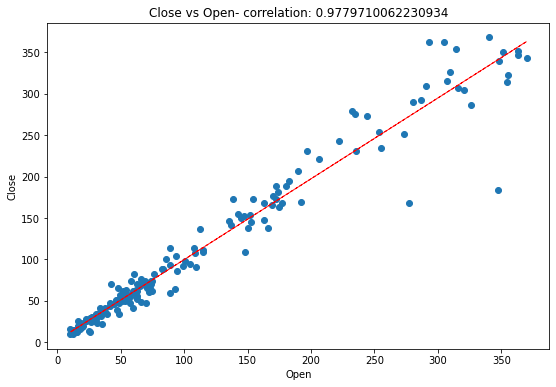

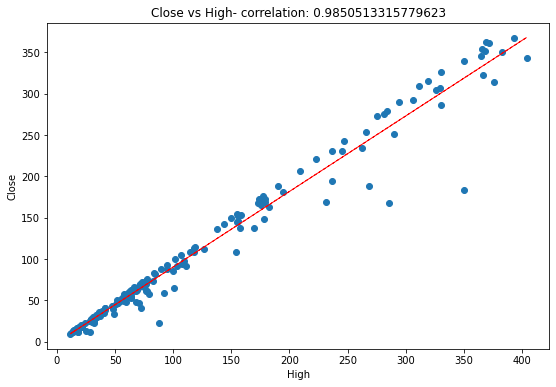

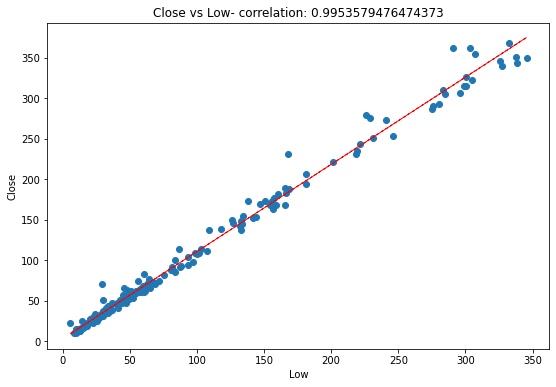

In [ ]:
# Plotting a scatter plot for checking correlation with the target feature

for col in numerical_col[:-1]:
  # Defining the size of the graph
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    # Defining the type of graph
    plt.scatter(x=feature, y=label)
    # Defining the labels of the graph
    plt.xlabel(col)
    plt.ylabel('Close')
    # Defining the title of the graph
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    # Finding the least square polynomial fit
    z = np.polyfit(df[col], df['Close'], 1)
    y_hat = np.poly1d(z)(df[col])
    # Displaying the graph
    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

## It is evident that the independent features are so correlated with the target variable, thus we can expect a regression model with higher accuracy.

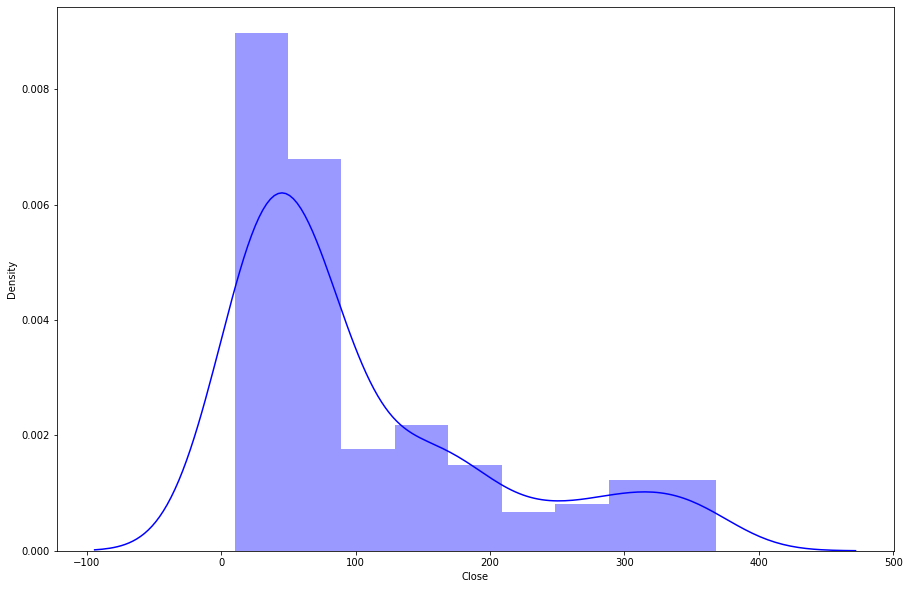

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,10))
#Plotting distplot of the Close distribution
sns.distplot(df['Close'],color="blue")

## We can see that the target feature is forming an negatively skewed normal distribution.Thus we can centralized normalize the features in order to plot a normal distributed figure using logarathmic function. 

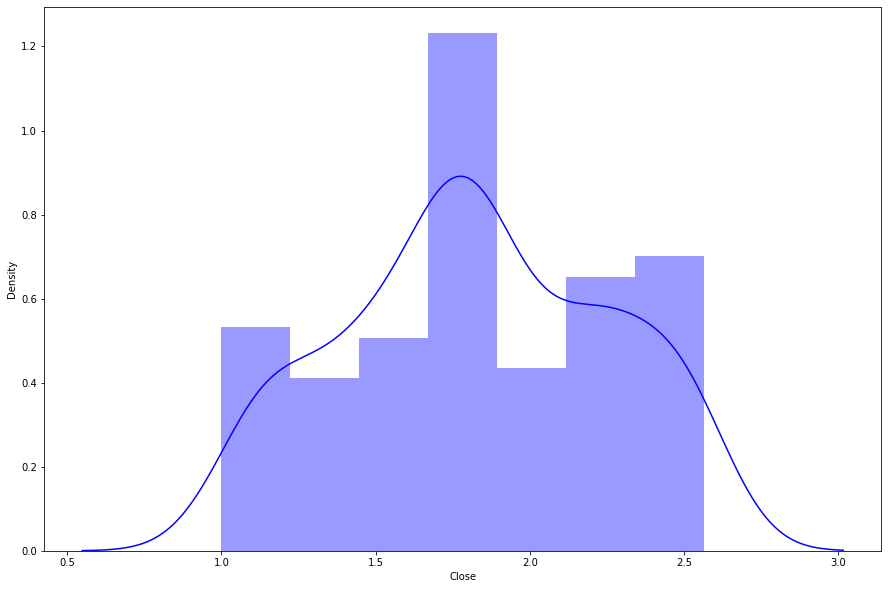

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,10))

#Plotting distplot of the normalized Close distribution 
sns.distplot(np.log10(df['Close']),color="blue")

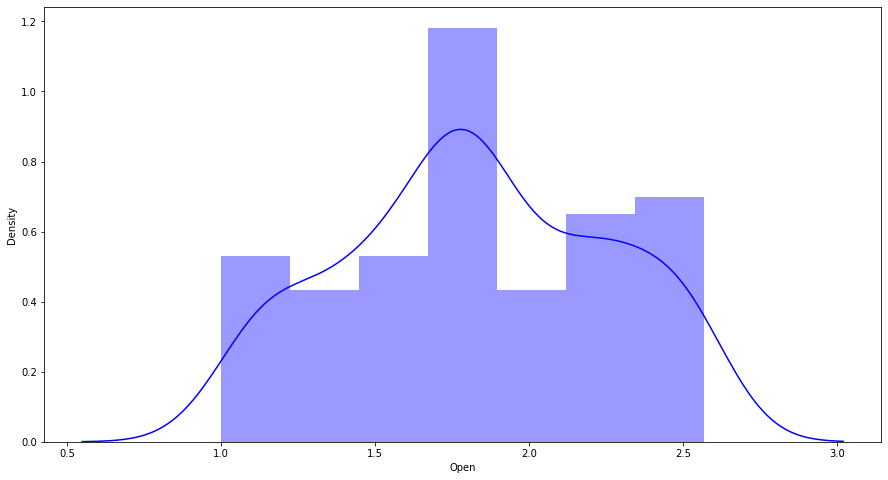

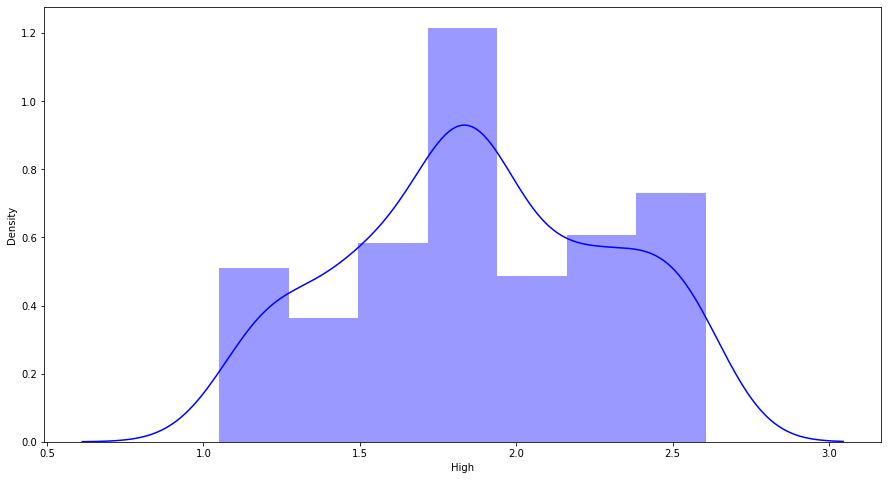

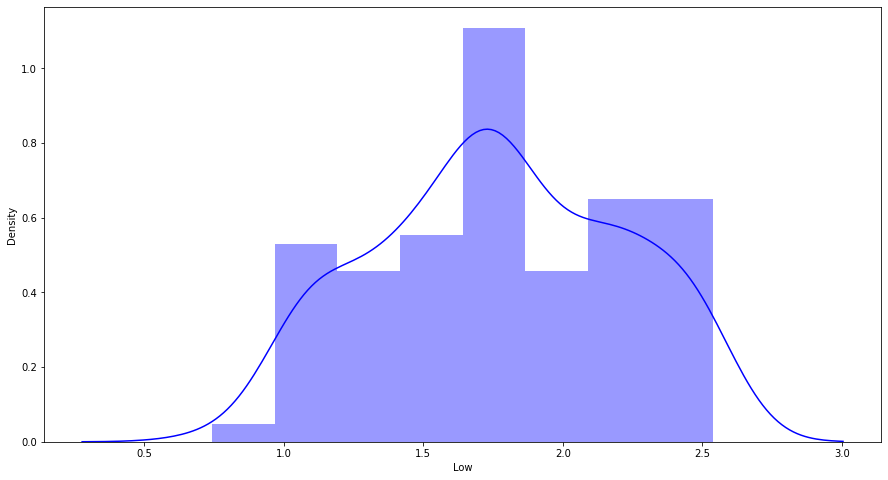

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,8))

#Plotting distplot of the normalized Open distribution
sns.distplot(np.log10(df['Open']), color='blue')

# Defining the size of the graph
plt.figure(figsize=(15,8))

#Plotting distplot of the normalized High distribution
sns.distplot(np.log10(df['High']), color='blue')

# Defining the size of the graph
plt.figure(figsize=(15,8))

#Plotting distplot of the normalized Low distribution
sns.distplot(np.log10(df['Low']), color='blue')

## The same is applicable in order to display histograms for all the numerical features with their respective mean and medians.

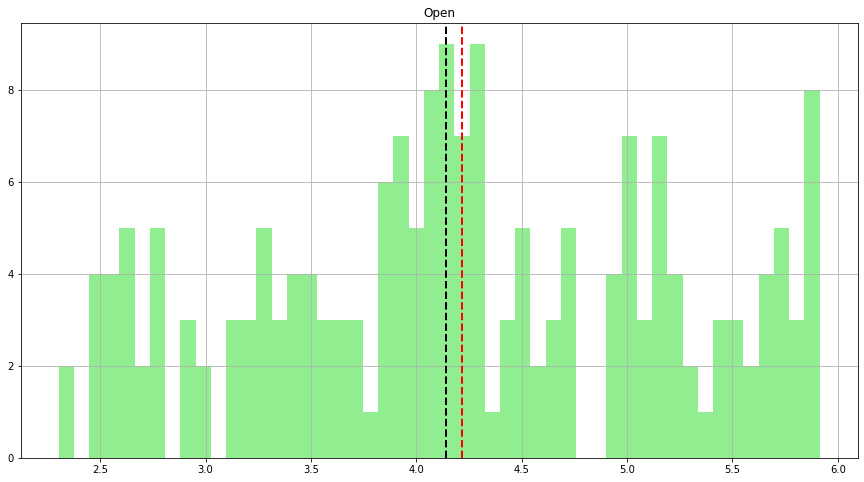

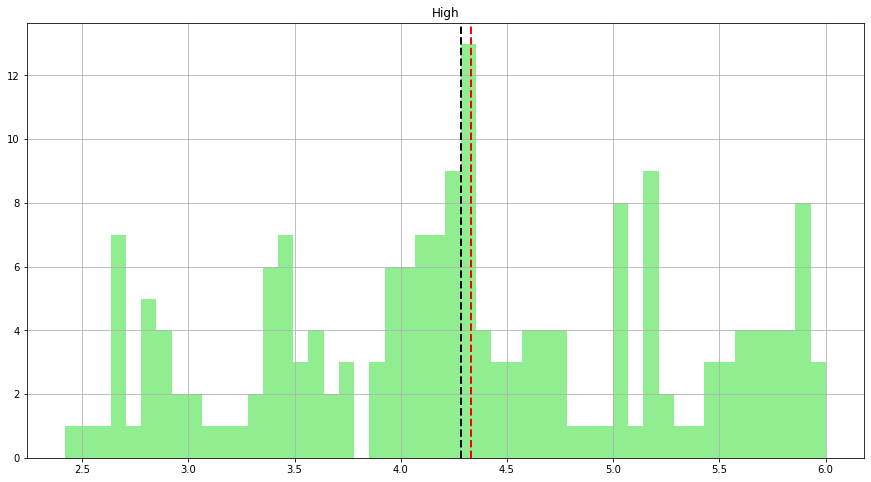

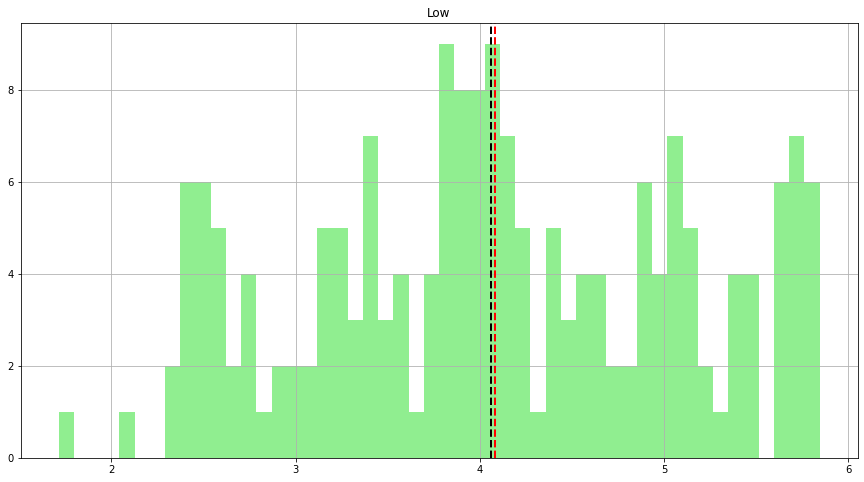

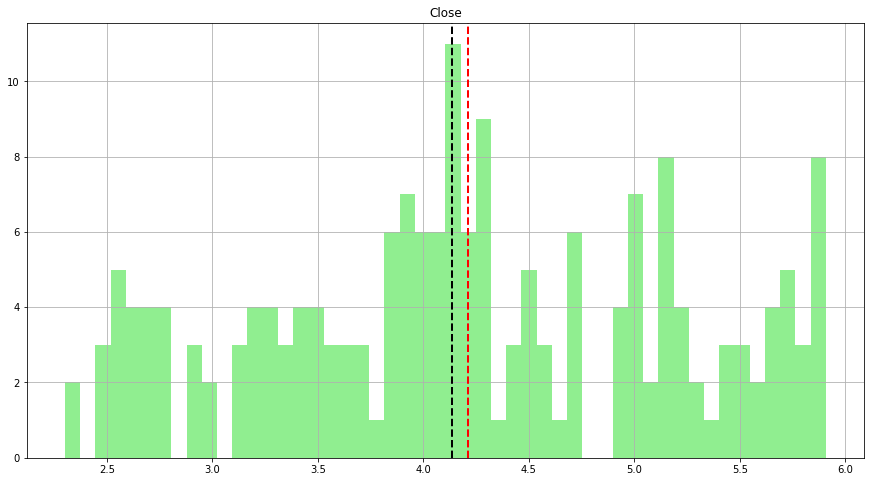

In [ ]:
for col in numerical_col[:]:
   # Defining the size of the graph
    fig = plt.figure(figsize=(15, 8))
    ax = fig.gca()
    # Normalizing the values using logarithamic function
    feature = np.log(df[col])
    # Defining the number of bins and colur of the graph
    feature.hist(bins=50, ax = ax,color="lightgreen")
    # Definig the mean properties
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    # Defining the median properties
    ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)  
    # Defining the title of the graph  
    ax.set_title(col)
# Displaying the graph    
plt.show()

# **Correlation Check**

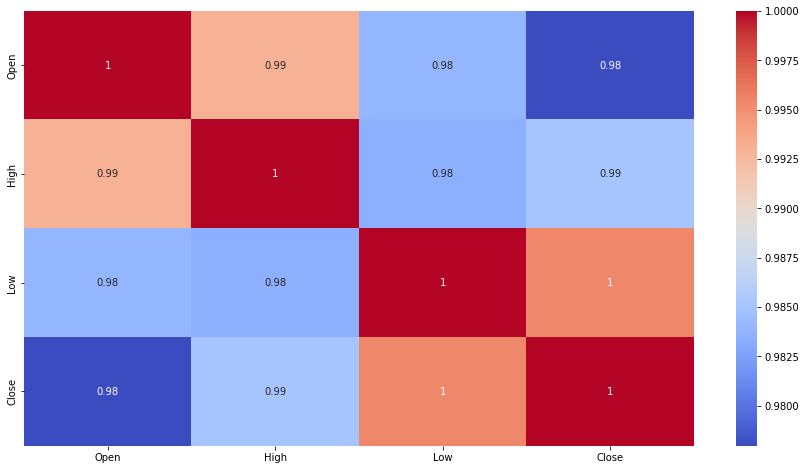

In [ ]:
#Defining the corr variable to the numerical columns
corr = df.corr()

# Defining the size of the graph
plt.figure(figsize = (15,8))

#Plotting a heatmap
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

# **Checking multicollinerity**

In [ ]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a VIF function
def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

## Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.

In [ ]:
# Checking the collinearity of each dependent features
cal_vif(df[[i for i in df.describe().columns if i not in ['Close','Date']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


# Checking the current trend of the dataset using bar graphs.

<Figure size 1080x576 with 0 Axes>

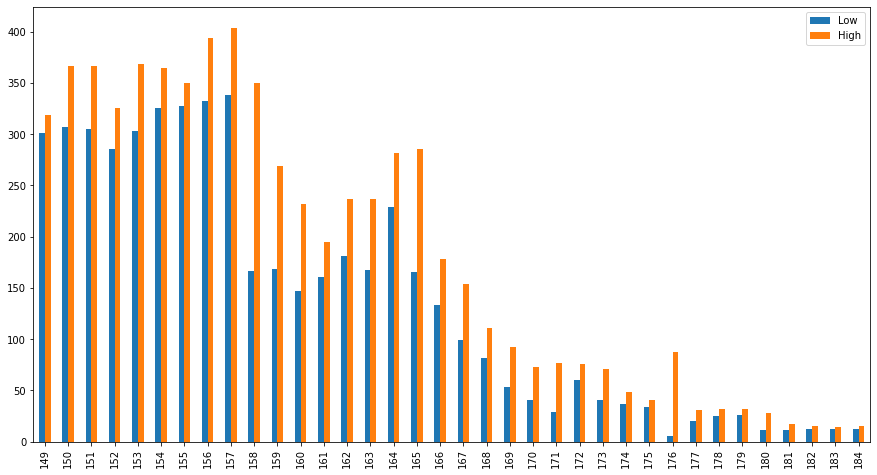

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,8))

#Plotting a bar graph comparing High and Low
df[['Low','High']].tail(36).plot(kind='bar',figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

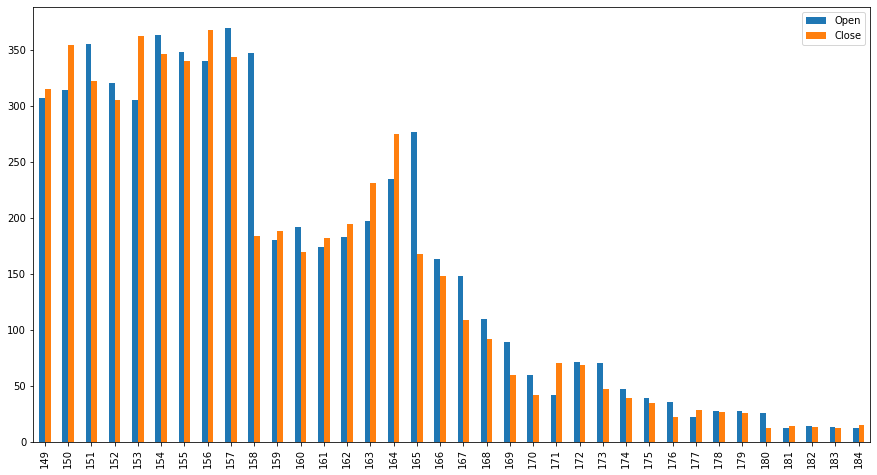

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,8))
#Plotting a bar graph comparing Open and Close
df[['Open','Close']].tail(36).plot(kind='bar',figsize=(15,8))

## From the above two bar graphs it is evident that the last two years has been in downhill due to the fraudulent case on the Owner

# **Normalization**

## Using z-score, If a value is exactly equal to the mean of all the values of the feature, it will be normalized to 0. If it is below the mean, it will be a negative number, and if it is above the mean it will be a positive number. ... This is the same data as before, but this time we're using z-score normalization.

In [ ]:
# Defining X to the normalized features except Date and Close
X = df.drop(columns=['Close','Date']).apply(zscore)

# Defining y to the normalized feature Close
y = np.log10(df['Close'])

In [ ]:
#Creating Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 1)

In [ ]:
# Checking  the shapes of Training and Testing Datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


In [ ]:
# Checking the Testing Independent feature
X_test

,Open,High,Low
16,-0.839058,-0.826382,-0.808462
179,-0.788862,-0.793566,-0.762844
66,-0.431604,-0.495676,-0.500787
40,-0.920285,-0.926999,-0.920034
166,0.585714,0.584141,0.418831
155,2.458707,2.206555,2.554641
97,-0.400979,-0.455410,-0.568609
177,-0.844128,-0.807711,-0.820553
35,-0.753673,-0.791020,-0.795051
54,-0.526724,-0.551878,-0.533434


In [ ]:
# Defining reg to the Linear Regresion function
reg = LinearRegression()

# Fitting the Training dataset into the model
reg = reg.fit(X_train,y_train)

In [ ]:
# Checking the Accuracy of the model
reg.score(X_train, y_train)

0.8146653424416905

In [ ]:
reg.score(X_test,y_test)

0.8225699915389754

In [ ]:
# Predicting using the Testing Features
y_test_pred = reg.predict(X_test)

# Predicting using the Training Features
y_train_pred = reg.predict(X_train)

In [ ]:
# Checking the y-intercept value of the model
reg.intercept_

1.8292785179315048

In [ ]:
#Checking the co-efficients of the model
reg.coef_

array([-0.04654099,  0.19795929,  0.23173905])

In [ ]:
# Train Performance

# Evaluation Metrics of the Trained model
print("MSE :",mean_squared_error(y_train, y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE :",mean_absolute_error(y_train, y_train_pred))
print("R2 :",r2_score(y_train, y_train_pred))

MSE : 0.03365939576594667
RMSE : 0.1834649714957781
MAE : 0.15591697668200555
R2 : 0.8146653424416905


In [ ]:
# Test Performance

# Evaluation Metrics of the Tested model
print("MSE :",mean_squared_error(y_test, y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_test_pred))
print("R2 :",r2_score(y_test, y_test_pred))

MSE : 0.031582518930487385
RMSE : 0.1777147121948191
MAE : 0.15128511034606282
R2 : 0.8225699915389754


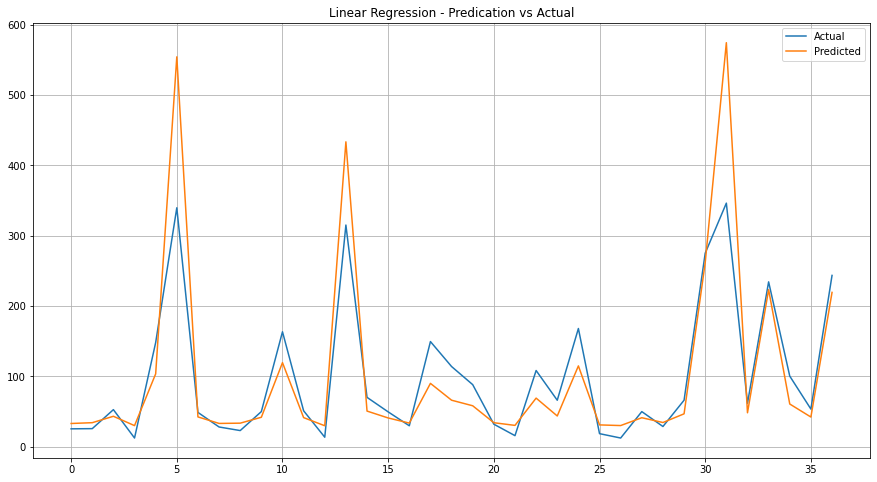

In [ ]:
# Linear Regression Plotting Prediction over Actual

# Defining the size of the graph
plt.figure(figsize=(15,8))

#Plotting line plot of the Prediction model
plt.plot(10**(np.array(y_test)))

#Plotting line plot of the Actual model
plt.plot(10**(y_test_pred))

# Defining the title of the graph
plt.title('Linear Regression - Predication vs Actual')

# Defining the legend title
plt.legend(['Actual','Predicted'])

# Defining the grid lines
plt.grid()

#Displaying the gragh
plt.show()

In [ ]:
#Importing Lasso Regression from Sklearn.linear_model
from sklearn.linear_model import Lasso

#Defining lasso to the Lasso Regression function
lasso = Lasso(alpha=0.005,max_iter=3000)

# Fitting the Training Dataset to the Lasso Regression model
lasso_model = lasso.fit(X_train,y_train)

In [ ]:
# Checking the Lasso train model accuracy
lasso.score(X_train,y_train)

0.8143673030311667

In [ ]:
lasso.score(X_test,y_test)

0.8199714923878543

In [ ]:
# Predicting using the Testing Features
y_lasso_pred = lasso.predict(X_test)

In [ ]:
# Test Performance

# Evaluation Metrics of the Predicted Lasso model
print("MSE :",mean_squared_error(y_test,y_lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("MAE :",mean_absolute_error(y_test, y_lasso_pred))
print("R2 :",r2_score(y_test, y_lasso_pred))

MSE : 0.03204505144876297
RMSE : 0.17901131653826516
MAE : 0.15232245780607623
R2 : 0.8199714923878543


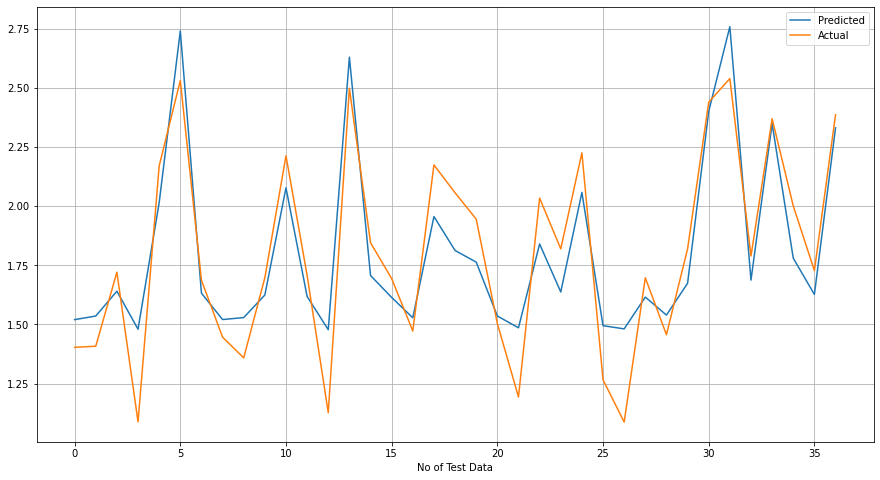

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,8))

# Plotting line plot of the Prediction model
plt.plot(y_lasso_pred)

#Plotting line plot of the Actual model
plt.plot(np.array(y_test))

# Defining the legend title
plt.legend(["Predicted","Actual"])

# Defining the X label
plt.xlabel('No of Test Data')

# Defining the grid lines
plt.grid()

#Displaying the gragh
plt.show()

## **Hyperparameter Tuning**

In [ ]:
# Importing GridSearch CV from sklearn
from sklearn.model_selection import GridSearchCV

# Hyper-parameter Tuning

#Defining lasso_cv to the lasso function
lasso_cv = Lasso()

# Defining the alpha range
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}

#Searching through the model for best hyperparameters
lasso_model = GridSearchCV(lasso_cv,parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [ ]:
# Fitting the model with Training features
lasso_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
# Displaying the best fit alpha value for the model
print("The best fit alpha value is found out to be :" ,lasso_model.best_params_)

# Displaying the Neagative mean square error value for that alpha value
print("\nUsing ",lasso_model.best_params_, " the negative mean squared error is: ", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03515384844892758


In [ ]:
# Predicting using the Training target feature
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
# Test Performance

# Evaluation Metrics of the Tuned Lasso model
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


##Lasso Predication vs Actual (After Validification)

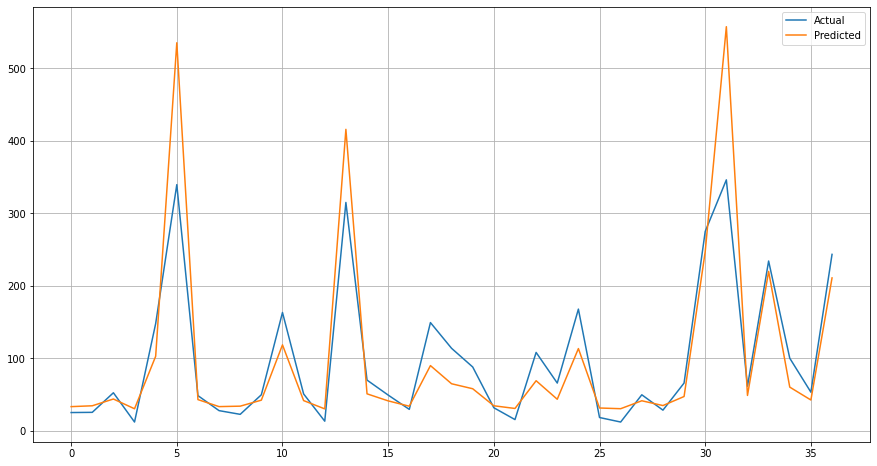

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,8))

#Plotting line plot of the Prediction model
plt.plot(10**(np.array(y_test)))

#Plotting line plot of the Actual model
plt.plot(10**(y_pred_lasso))

# Defining the legend title
plt.legend(['Actual','Predicted'])

# Defining the grid lines
plt.grid()

#Displaying the gragh
plt.show()

In [ ]:
#Importing Ridge Regression from Sklearn.linear_model
from sklearn.linear_model import Ridge

In [ ]:
# Defining ridge to the Ridge Regression function
ridge  = Ridge(alpha=0.1)


# Fitting the Training Dataset to the Ridge Regression model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# Checkin the Ridge model accuracy
ridge.score(X_train, y_train)

0.81465524840887

In [ ]:
# Predicting using the Testing Features
y_ridge_pred = ridge.predict(X_test)

In [ ]:
# Test performance

# Evaluation metrics of Predicted Ridge model
print("MSE :",mean_squared_error(y_test, y_ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("MAE :",mean_absolute_error(y_test, y_ridge_pred))
print("R2 :",r2_score(y_test, y_ridge_pred))

MSE : 0.03165980533958239
RMSE : 0.17793202449132756
MAE : 0.15143117100922016
R2 : 0.8221357979190861


##Ridge Predication vs Actual

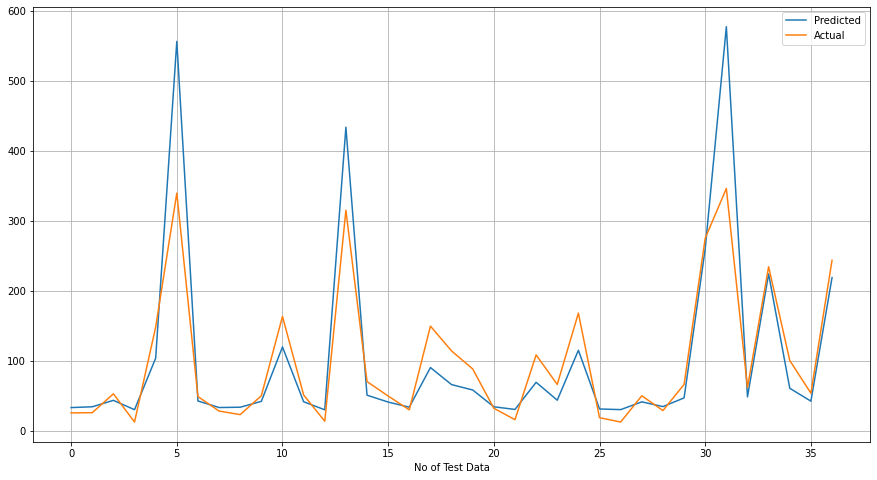

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,8))

# Plotting line plot of the Prediction model
plt.plot(10**(y_ridge_pred))

# Plotting line plot of the Actual model
plt.plot(10**(np.array(y_test)))

# Defining the legend of the graph
plt.legend(["Predicted","Actual"])

# Defining the X label
plt.xlabel('No of Test Data')

# Defining the grid lines
plt.grid()

#Displaying the gragh
plt.show()

## **Hyperparameter Tuning**

In [ ]:
# Hyper-parameter Tuning

# Defining ridge_cv to the Ridge Function
ridge_cv = Ridge()

# Defining the alpha range
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

# Searching through the model for best hyperparameters
ridge_model = GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=3)

# Fitting the model with Training dataset
ridge_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Searching through the model for best hyperparameters
print("The best fit alpha value is found out to be :" ,ridge_model.best_params_)

# Displaying the Neagative mean square error value for that alpha value
print("\nUsing ",ridge_model.best_params_, " the negative mean squared error is: ", ridge_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.035198971562466846


In [ ]:
# Predicting using the Testing independent features
y_pred_ridge  = ridge_model.predict(X_test)

In [ ]:
# Test Performance

#Evaluation metrics of the Predicted Ridge model
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))

MSE : 0.03253593988266965
RMSE : 0.18037721553086924
MAE : 0.15307727568266652
R2 : 0.8172136902260576


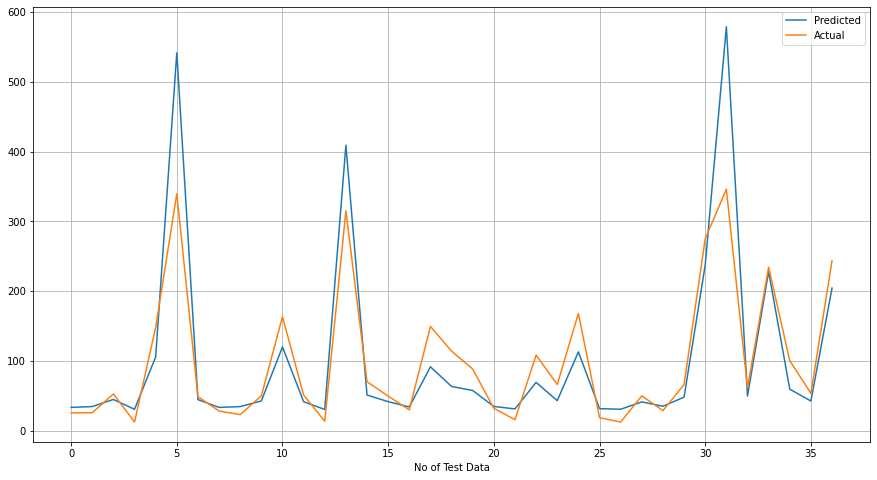

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,8))

# Plotting line plot of the Prediction model
plt.plot(10**(y_pred_ridge))

# Plotting line plot of the Actual model
plt.plot(10**(np.array(y_test)))

# Defining the legend of the graph
plt.legend(["Predicted","Actual"])

# Defining the X label
plt.xlabel('No of Test Data')

# Defining the grid lines
plt.grid()

#Displaying the gragh
plt.show()

#Elastic Net Linear Regression

In [ ]:
#Importing Elastic Net Regression from sklearn

from sklearn.linear_model import ElasticNet

In [ ]:
#Applying Elastic net to the training dataset

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# Predicting using the Testing independent features
y_elastic_pred = elastic.predict(X_test)

In [ ]:
# Elastic Net Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_elastic_pred)))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03640066957363815
RMSE : 0.19078959503504941
MAE : 0.15744198421541944
R2 : 0.7955017101500742


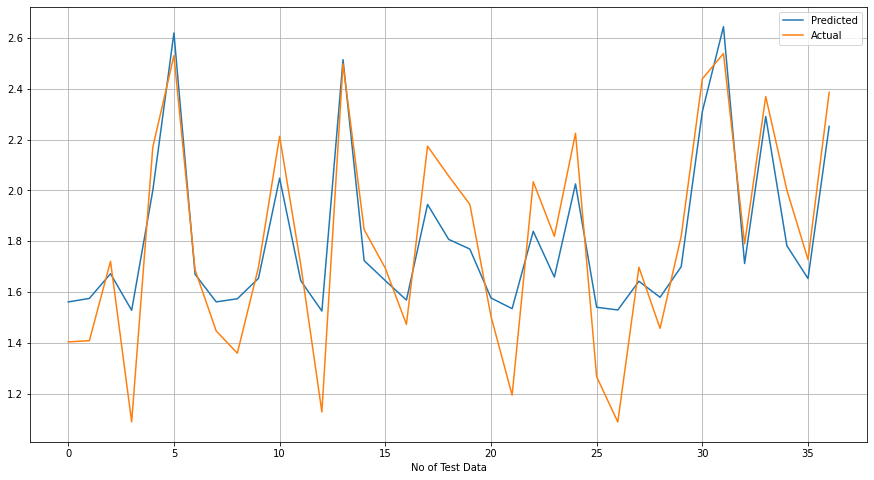

In [ ]:
# Defining the size of the graph
plt.figure(figsize=(15,8))

# Plotting line plot of the Prediction model
plt.plot(y_elastic_pred)

# Plotting line plot of the Actual model
plt.plot(np.array(y_test))

# Defining the legend of the graph
plt.legend(["Predicted","Actual"])

# Defining the X label
plt.xlabel('No of Test Data')

# Defining the grid lines
plt.grid()

#Displaying the gragh
plt.show()

##Cross Validification and Hyper Parameter tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyper-parameter Tuning

# Defining elastic_cv to the Elastic Net Function
elastic_cv = ElasticNet()

# Defining the alpha range and l1 ratio range
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}

# Searching through the model for best hyperparameters
elastic_model = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)

# Fitting the model with Training dataset
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
# Searching through the model for best hyperparameters
print("The best fit alpha value is found out to be :" ,elastic_model.best_params_)
# Displaying the Neagative mean square error value for that alpha value and l1 ratio
print("\nUsing ",elastic_model.best_params_, " the negative mean squared error is: ", elastic_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 1}

Using  {'alpha': 0.01, 'l1_ratio': 1}  the negative mean squared error is:  -0.03515384844892758


In [ ]:
# Predicting using the Testing independent features
y_elastic_pred = elastic_model.predict(X_test)

In [ ]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test,y_elastic_pred )))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03222273336072056
RMSE : 0.17950691730604856
MAE : 0.15277731058358668
R2 : 0.8189732786857935


##ElasticNet Predication vs Actual (After Validification)

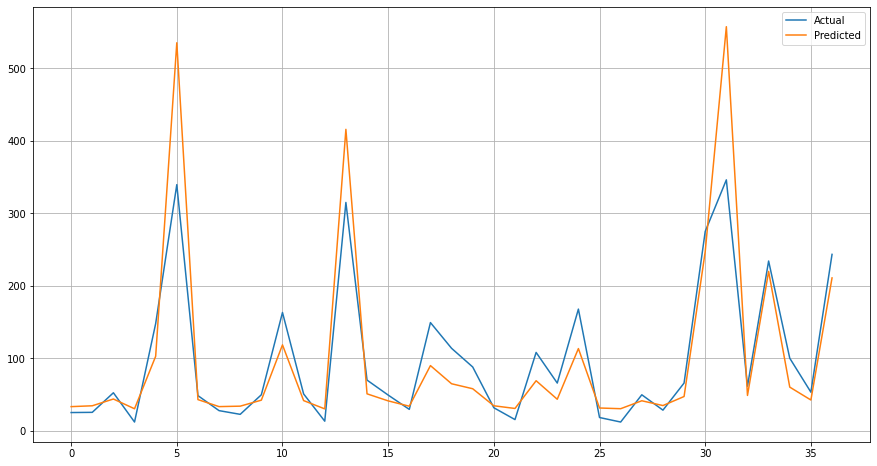

In [ ]:
## Defining the size of the graph
plt.figure(figsize=(15,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

## **Conclusion**

### That's it! We reached the end of our exercise. Starting with loading the data so far we have done EDA , null values treatment, encoding of categorical columns, feature selection and then model building. In all of these models our accuracy revolves in the range of 80 to 83%. And there is no such improvement in accuracy score even after hyper parameter tuning. So the accuracy of our best model is 81% which can be said to be good for this very small dataset because of underfitting. This performance could be due to various reasons like multicollinearity of data,very small dataset as well as correct selection of models and hyperparameter tuning.